### yield loss

maiz 73.61525481339025
soyb 75.47829679844125
rice 69.7092647391993
whea 70.97251275638119


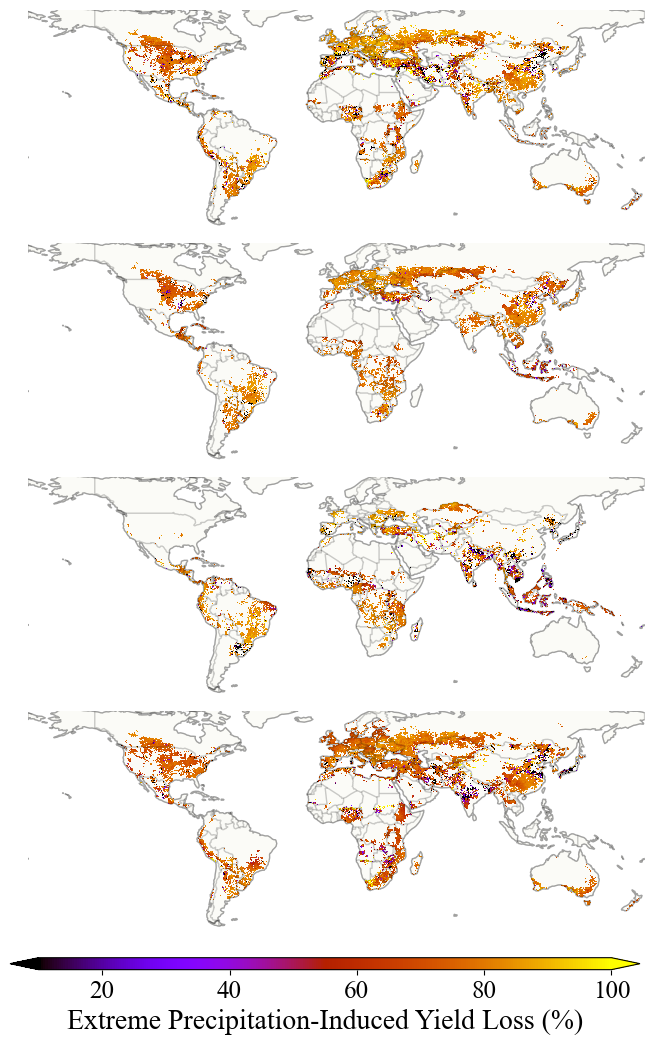

In [91]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure(figsize=(9, 12))
gs = GridSpec(4, 1, figure=fig)  # 4行1列布局
crops=['maiz','soyb','rice','whea']
var='flood_yr'
data_dict={}
# 遍历每个作物
for idx, crop in enumerate(crops):
    data_dict[crop]={}
    if crop !='whea':
        frac_irr=xr.open_dataset(join(frac_fp,f'{crop}_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'{crop}_sou_irr.nc'))['__xarray_dataarray_variable__']
        frac_rf=xr.open_dataset(join(frac_fp,f'{crop}_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'{crop}_sou_rf.nc'))['__xarray_dataarray_variable__']
        yield_irr=xr.open_dataset(join(fp2,f'{crop}_nor_irr_threshold_climate_yield_percentage.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'{crop}_sou_irr_threshold_climate_yield_percentage.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp2,f'{crop}_nor_rf_threshold_climate_yield_percentage.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'{crop}_sou_rf_threshold_climate_yield_percentage.nc'))[var].fillna(0)
        yield_change=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change=yield_change.where(yield_change>0)
    else:
        frac_irr=xr.open_dataset(join(frac_fp,f'swh_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'swh_sou_irr.nc'))['__xarray_dataarray_variable__']+\
        xr.open_dataset(join(frac_fp,f'wwh_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'wwh_sou_irr.nc'))['__xarray_dataarray_variable__']
        frac_rf=xr.open_dataset(join(frac_fp,f'swh_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'swh_sou_rf.nc'))['__xarray_dataarray_variable__']+\
        xr.open_dataset(join(frac_fp,f'wwh_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'wwh_sou_rf.nc'))['__xarray_dataarray_variable__']
        yield_irr=xr.open_dataset(join(fp2,f'swh_nor_irr_threshold_climate_yield_percentage.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'swh_sou_irr_threshold_climate_yield_percentage.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp2,f'wwh_nor_irr_threshold_climate_yield_percentage.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'wwh_sou_irr_threshold_climate_yield_percentage.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp2,f'swh_nor_rf_threshold_climate_yield_percentage.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'swh_sou_rf_threshold_climate_yield_percentage.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp2,f'wwh_nor_rf_threshold_climate_yield_percentage.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'wwh_sou_rf_threshold_climate_yield_percentage.nc'))[var].fillna(0)
        yield_change=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change=yield_change.where(yield_change>0)
    data_dict[crop]=yield_change

    ax = fig.add_subplot(gs[idx], projection=ccrs.PlateCarree())
    

    ax.set_extent([-180, 180, -60, 70], crs=ccrs.PlateCarree())
    

    ax.add_feature(cfeature.COASTLINE, alpha=0.2)
    ax.add_feature(cfeature.LAND, edgecolor='black', alpha=0.2)
    
    # 绘制数据并设置颜色带
    im = yield_change.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='gnuplot', 
                         vmin=10, vmax=100, add_colorbar=False)
    print(crop,yield_change.mean().values)
    # 移除网格线
    gl = ax.gridlines(draw_labels=False)
    gl.xlines = False
    gl.ylines = False

    # 去除四周边框
    ax.spines['geo'].set_visible(False)
    # ax.text(-0.05, 0.5, crop, transform=ax.transAxes, fontsize=14, 
    #         verticalalignment='center', horizontalalignment='center', rotation=90)
    ax.add_feature(cfeature.BORDERS, edgecolor='black', alpha=0.2)
# 添加一个全局的颜色带
cbar_ax = fig.add_axes([0.15, 0.08, 0.7, 0.01]) 
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', pad=0.03, shrink=1, aspect=50, extend='both')
cbar.set_label('Extreme Precipitation-Induced Yield Loss (%)', fontsize=20)
cbar.ax.tick_params(labelsize=18)

fig.subplots_adjust(hspace=0.05)  


plt.savefig(rf'F:\paper3_fig_v2\extreme\threshold\fig\Extreme Precipitation-Induced Yield Loss.png', dpi=300)
plt.show()

maiz 61.484690422380076
soyb 60.31700748116688
rice 54.91527259964129
whea 61.87489053756732


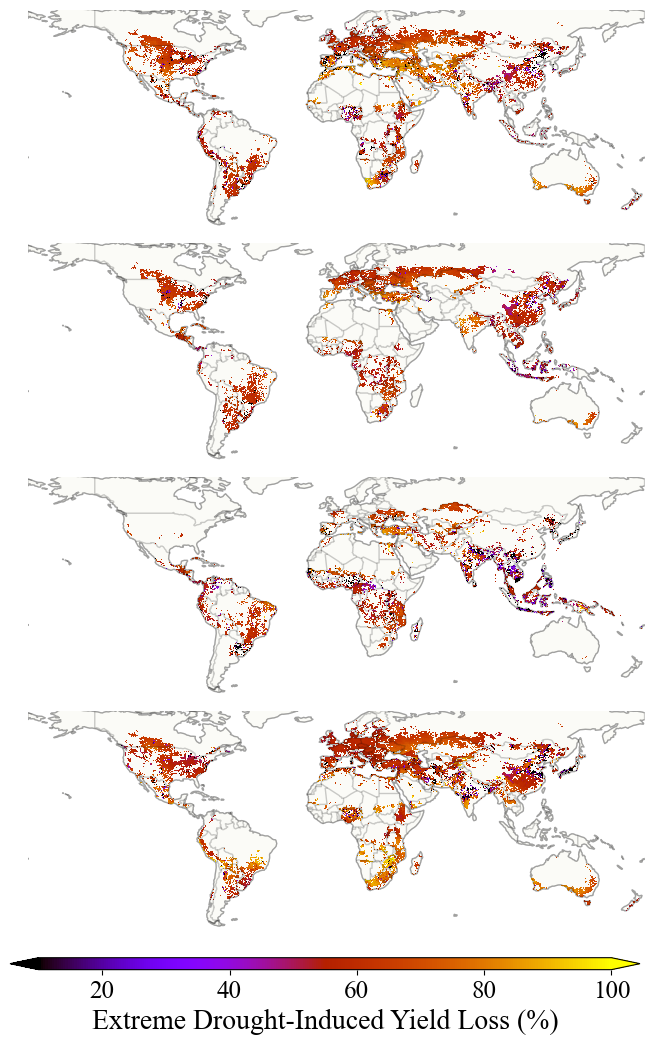

In [93]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure(figsize=(9, 12))
gs = GridSpec(4, 1, figure=fig)  # 4行1列布局
crops=['maiz','soyb','rice','whea']
var='drought_yr'
data_dict={}
# 遍历每个作物
for idx, crop in enumerate(crops):
    data_dict[crop]={}
    if crop !='whea':
        frac_irr=xr.open_dataset(join(frac_fp,f'{crop}_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'{crop}_sou_irr.nc'))['__xarray_dataarray_variable__']
        frac_rf=xr.open_dataset(join(frac_fp,f'{crop}_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'{crop}_sou_rf.nc'))['__xarray_dataarray_variable__']
        yield_irr=xr.open_dataset(join(fp2,f'{crop}_nor_irr_threshold_climate_yield_percentage.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'{crop}_sou_irr_threshold_climate_yield_percentage.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp2,f'{crop}_nor_rf_threshold_climate_yield_percentage.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'{crop}_sou_rf_threshold_climate_yield_percentage.nc'))[var].fillna(0)
        yield_change=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change=yield_change.where(yield_change>0)
    else:
        frac_irr=xr.open_dataset(join(frac_fp,f'swh_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'swh_sou_irr.nc'))['__xarray_dataarray_variable__']+\
        xr.open_dataset(join(frac_fp,f'wwh_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'wwh_sou_irr.nc'))['__xarray_dataarray_variable__']
        frac_rf=xr.open_dataset(join(frac_fp,f'swh_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'swh_sou_rf.nc'))['__xarray_dataarray_variable__']+\
        xr.open_dataset(join(frac_fp,f'wwh_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'wwh_sou_rf.nc'))['__xarray_dataarray_variable__']
        yield_irr=xr.open_dataset(join(fp2,f'swh_nor_irr_threshold_climate_yield_percentage.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'swh_sou_irr_threshold_climate_yield_percentage.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp2,f'wwh_nor_irr_threshold_climate_yield_percentage.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'wwh_sou_irr_threshold_climate_yield_percentage.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp2,f'swh_nor_rf_threshold_climate_yield_percentage.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'swh_sou_rf_threshold_climate_yield_percentage.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp2,f'wwh_nor_rf_threshold_climate_yield_percentage.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'wwh_sou_rf_threshold_climate_yield_percentage.nc'))[var].fillna(0)
        yield_change=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change=yield_change.where(yield_change>0)
    data_dict[crop]=yield_change
    # data_dict{crop}
        # 在4行1列的第 idx 个位置创建子图
    ax = fig.add_subplot(gs[idx], projection=ccrs.PlateCarree())
    
    # 设置显示范围为南纬60°到北纬60°
    ax.set_extent([-180, 180, -60, 70], crs=ccrs.PlateCarree())
    
    # 添加地图特征
    ax.add_feature(cfeature.COASTLINE, alpha=0.2)
    ax.add_feature(cfeature.LAND, edgecolor='black', alpha=0.2)
    
    # 绘制数据并设置颜色带
    im = yield_change.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='gnuplot', 
                         vmin=10, vmax=100, add_colorbar=False)
    print(crop,yield_change.mean().values)
    # 移除网格线
    gl = ax.gridlines(draw_labels=False)
    gl.xlines = False
    gl.ylines = False

    # 去除四周边框
    ax.spines['geo'].set_visible(False)
    # ax.text(-0.05, 0.5, crop, transform=ax.transAxes, fontsize=14, 
    #         verticalalignment='center', horizontalalignment='center', rotation=90)
    ax.add_feature(cfeature.BORDERS, edgecolor='black', alpha=0.2)
# 添加一个全局的颜色带
cbar_ax = fig.add_axes([0.15, 0.08, 0.7, 0.01])  # 颜色带的位置: [左, 下, 宽, 高]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', pad=0.03, shrink=1, aspect=50, extend='both')
cbar.set_label('Extreme Drought-Induced Yield Loss (%)', fontsize=20)
cbar.ax.tick_params(labelsize=18)
# 调整子图间距
fig.subplots_adjust(hspace=0.05)  # 这里的 hspace 控制垂直间距，可以根据需要调整

# 保存图像
plt.savefig(rf'F:\paper3_fig_v2\extreme\threshold\fig\Extreme drought-Induced Yield Loss.png', dpi=300)
plt.show()

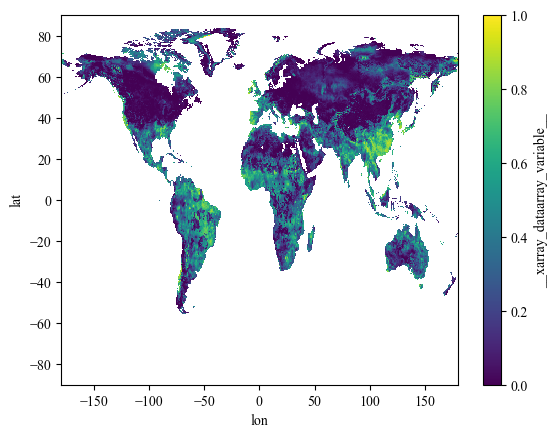

In [95]:
aa=xr.open_dataset(r'F:\paper3_fig\calibration\runoff\r2_values.nc').__xarray_dataarray_variable__
aa.plot()

C:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\111\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


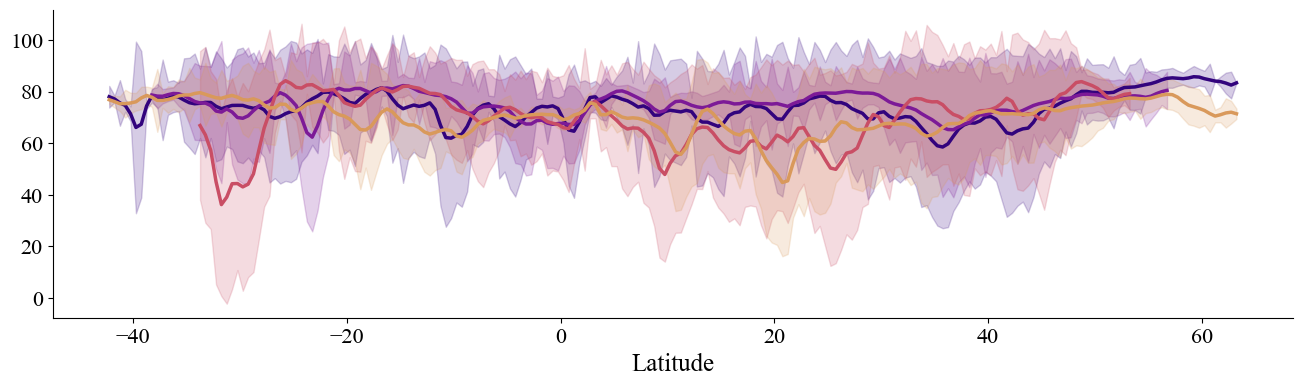

In [64]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
from scipy.ndimage import gaussian_filter1d
mpl.rcParams['font.family'] = 'Times New Roman'

crops = ['maiz', 'soyb', 'rice', 'whea']
crop_name = ['Maize', 'Soybean', 'Rice', 'Wheat']
# data_dcrop_name = ['Maize', 'Soybean', 'Rice', 'Wheat']ict = {}  # 假设这里已正确填充数据

# 作物颜色定义
colors = {
    'maiz': '#32037D',
    'soyb': '#7C1A97',
    'rice': '#C94E65',
    'whea': '#D9995B'
}

fig, ax = plt.subplots(figsize=(16, 4))

for crop, name in zip(crops, crop_name):
    # 获取每种作物在纬度上的均值和标准差（误差范围）
    latitudes = data_dict[crop].lat
    mean_values = gaussian_filter1d(data_dict[crop].mean(dim='lon'), sigma=1) 
    error_values = data_dict[crop].std(dim='lon', skipna=True)
    
    # 绘制曲线
    ax.plot(latitudes, mean_values, linewidth=2.5, color=colors[crop], label=name)

    # 绘制误差范围
    ax.fill_between(latitudes, mean_values - error_values, mean_values + error_values, 
                    color=colors[crop], alpha=0.2)

# 隐藏右侧和顶部的轴
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', labelsize=16)
ax.set_xlabel('Latitude', fontsize=18)

# 添加图例
# ax.legend(fontsize=14, loc='upper right')
plt.savefig(rf'F:\paper3_fig_v2\extreme\threshold\fig\yield_change_extreme_{var}_latitude.png', dpi=300)
plt.show()


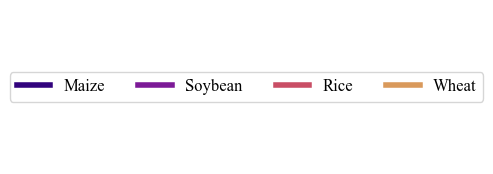

In [59]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# 设置字体
mpl.rcParams['font.family'] = 'Times New Roman'

# 作物颜色定义
crop_name = ['Maize', 'Soybean', 'Rice', 'Wheat']
colors = ['#32037D', '#7C1A97', '#C94E65', '#D9995B']

# 创建一个图形对象并关闭坐标轴
fig, ax = plt.subplots(figsize=(4, 2))
ax.axis('off')

# 创建虚拟图例句柄
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]

# 添加图例并保存
legend = ax.legend(handles, crop_name, fontsize=12, loc='center', ncol=4)
plt.savefig(r"F:\paper3_fig_v2\extreme\threshold\fig\legend_only.png", bbox_inches='tight', dpi=300)
plt.show()


### extreme weather change

maiz 22.848733097645184
soyb 20.534685747860994
rice 17.154874814311462
whea 17.82230329226728


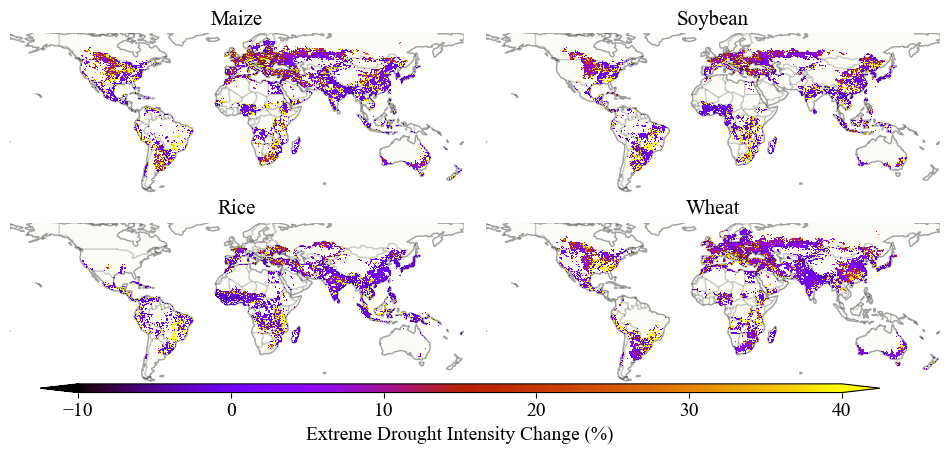

In [90]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
import numpy as np
fp2=r'F:\paper3_fig_v2\extreme\threshold\ssp585'
mpl.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure(figsize=(12, 4.35))
gs = GridSpec(2, 2, figure=fig)  # 4行1列布局
fig.subplots_adjust(hspace=0.005,top=0.96,wspace=0.05) 
crops=['maiz','soyb','rice','whea']
var='extereme_tas'
data_dict={}
# 遍历每个作物
for idx, crop in enumerate(crops):
    data_dict[crop]={}
    if crop !='whea':
        frac_irr=xr.open_dataset(join(frac_fp,f'{crop}_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'{crop}_sou_irr.nc'))['__xarray_dataarray_variable__']
        frac_rf=xr.open_dataset(join(frac_fp,f'{crop}_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'{crop}_sou_rf.nc'))['__xarray_dataarray_variable__']
        yield_irr=xr.open_dataset(join(fp2,f'{crop}_nor_irr_extreme_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'{crop}_sou_irr_extreme_climate.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp2,f'{crop}_nor_rf_extreme_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'{crop}_sou_rf_extreme_climate.nc'))[var].fillna(0)
        yield_change=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change=yield_change.where((frac_rf+frac_irr)>0)
    else:
        frac_irr=xr.open_dataset(join(frac_fp,f'swh_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'swh_sou_irr.nc'))['__xarray_dataarray_variable__']+\
        xr.open_dataset(join(frac_fp,f'wwh_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'wwh_sou_irr.nc'))['__xarray_dataarray_variable__']
        frac_rf=xr.open_dataset(join(frac_fp,f'swh_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'swh_sou_rf.nc'))['__xarray_dataarray_variable__']+\
        xr.open_dataset(join(frac_fp,f'wwh_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'wwh_sou_rf.nc'))['__xarray_dataarray_variable__']
        yield_irr=xr.open_dataset(join(fp2,f'swh_nor_irr_extreme_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'swh_sou_irr_extreme_climate.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp2,f'wwh_nor_irr_extreme_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'wwh_sou_irr_extreme_climate.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp2,f'swh_nor_rf_extreme_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'swh_sou_rf_extreme_climate.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp2,f'wwh_nor_rf_extreme_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'wwh_sou_rf_extreme_climate.nc'))[var].fillna(0)
        yield_change=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change=yield_change.where((frac_rf+frac_irr)>0)
    yield_change = yield_change.where(np.isfinite(yield_change), np.nan)
    data_dict[crop]=yield_change
    
    # data_dict{crop}
        # 在4行1列的第 idx 个位置创建子图
    ax = fig.add_subplot(gs[idx], projection=ccrs.PlateCarree())
    
    # 设置显示范围为南纬60°到北纬60°
    ax.set_extent([-180, 180, -60, 70], crs=ccrs.PlateCarree())
    
    # 添加地图特征
    ax.add_feature(cfeature.COASTLINE, alpha=0.2)
    ax.add_feature(cfeature.LAND, edgecolor='black', alpha=0.2)
    
    # 绘制数据并设置颜色带
    im = yield_change.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='gnuplot', 
                         vmin=-10, vmax=40, add_colorbar=False)
    print(crop,yield_change.mean().values)
    # 移除网格线
    gl = ax.gridlines(draw_labels=False)
    gl.xlines = False
    gl.ylines = False
    ax.set_title(crop_name[idx], fontsize=15)
    # 去除四周边框
    ax.spines['geo'].set_visible(False)
    # ax.text(-0.05, 0.5, crop, transform=ax.transAxes, fontsize=14, 
    #         verticalalignment='center', horizontalalignment='center', rotation=90)
    ax.add_feature(cfeature.BORDERS, edgecolor='black', alpha=0.2)
# 添加一个全局的颜色带
cbar_ax = fig.add_axes([0.15, 0.115, 0.7, 0.02])  # 颜色带的位置: [左, 下, 宽, 高]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', pad=0.03, shrink=1, aspect=50, extend='both')
cbar.set_label('Extreme Drought Intensity Change (%)', fontsize=14)
cbar.ax.tick_params(labelsize=14)
# 调整子图间距
fig.subplots_adjust(hspace=0.05)  # 这里的 hspace 控制垂直间距，可以根据需要调整

# 保存图像
plt.savefig(rf'F:\paper3_fig_v2\extreme\threshold\fig\Extreme Drought Intensity Change.png', dpi=300)
plt.show()

maiz -0.017383258515266124
soyb -0.007862489692536905
rice -0.0029185972939418585
whea -0.012170160736578


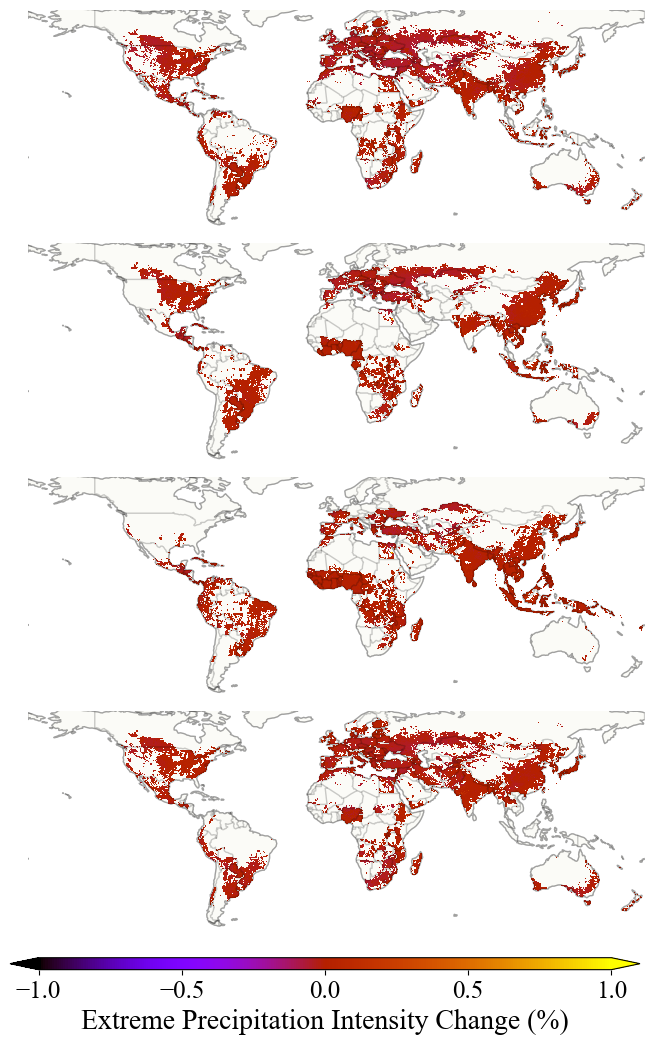

In [37]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
fp2=r'F:\paper3_fig_v2\extreme\threshold\ssp585'
mpl.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure(figsize=(9, 12))
gs = GridSpec(4, 1, figure=fig)  # 4行1列布局
crops=['maiz','soyb','rice','whea']
var='extereme_pr'
data_dict={}
# 遍历每个作物
for idx, crop in enumerate(crops):
    data_dict[crop]={}
    if crop !='whea':
        frac_irr=xr.open_dataset(join(frac_fp,f'{crop}_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'{crop}_sou_irr.nc'))['__xarray_dataarray_variable__']
        frac_rf=xr.open_dataset(join(frac_fp,f'{crop}_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'{crop}_sou_rf.nc'))['__xarray_dataarray_variable__']
        yield_irr=xr.open_dataset(join(fp2,f'{crop}_nor_irr_extreme_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'{crop}_sou_irr_extreme_climate.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp2,f'{crop}_nor_rf_extreme_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'{crop}_sou_rf_extreme_climate.nc'))[var].fillna(0)
        yield_change=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change=yield_change.where((frac_rf+frac_irr)>0)
    else:
        frac_irr=xr.open_dataset(join(frac_fp,f'swh_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'swh_sou_irr.nc'))['__xarray_dataarray_variable__']+\
        xr.open_dataset(join(frac_fp,f'wwh_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'wwh_sou_irr.nc'))['__xarray_dataarray_variable__']
        frac_rf=xr.open_dataset(join(frac_fp,f'swh_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'swh_sou_rf.nc'))['__xarray_dataarray_variable__']+\
        xr.open_dataset(join(frac_fp,f'wwh_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'wwh_sou_rf.nc'))['__xarray_dataarray_variable__']
        yield_irr=xr.open_dataset(join(fp2,f'swh_nor_irr_extreme_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'swh_sou_irr_extreme_climate.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp2,f'wwh_nor_irr_extreme_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'wwh_sou_irr_extreme_climate.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp2,f'swh_nor_rf_extreme_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'swh_sou_rf_extreme_climate.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp2,f'wwh_nor_rf_extreme_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'wwh_sou_rf_extreme_climate.nc'))[var].fillna(0)
        yield_change=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change=yield_change.where((frac_rf+frac_irr)>0)
    data_dict[crop]=yield_change
    # data_dict{crop}
        # 在4行1列的第 idx 个位置创建子图
    ax = fig.add_subplot(gs[idx], projection=ccrs.PlateCarree())
    
    # 设置显示范围为南纬60°到北纬60°
    ax.set_extent([-180, 180, -60, 70], crs=ccrs.PlateCarree())
    
    # 添加地图特征
    ax.add_feature(cfeature.COASTLINE, alpha=0.2)
    ax.add_feature(cfeature.LAND, edgecolor='black', alpha=0.2)
    
    # 绘制数据并设置颜色带
    im = yield_change.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='gnuplot', 
                         vmin=-1, vmax=1, add_colorbar=False)
    print(crop,yield_change.mean().values)
    # 移除网格线
    gl = ax.gridlines(draw_labels=False)
    gl.xlines = False
    gl.ylines = False

    # 去除四周边框
    ax.spines['geo'].set_visible(False)
    # ax.text(-0.05, 0.5, crop, transform=ax.transAxes, fontsize=14, 
    #         verticalalignment='center', horizontalalignment='center', rotation=90)
    ax.add_feature(cfeature.BORDERS, edgecolor='black', alpha=0.2)
# 添加一个全局的颜色带
cbar_ax = fig.add_axes([0.15, 0.08, 0.7, 0.01])  # 颜色带的位置: [左, 下, 宽, 高]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', pad=0.03, shrink=1, aspect=50, extend='both')
cbar.set_label('Extreme Precipitation Intensity Change (%)', fontsize=20)
cbar.ax.tick_params(labelsize=18)
# 调整子图间距
fig.subplots_adjust(hspace=0.05)  # 这里的 hspace 控制垂直间距，可以根据需要调整

# 保存图像
plt.savefig(rf'F:\paper3_fig_v2\extreme\threshold\fig\Extreme Precipitation Intensity Change.png', dpi=300)
plt.show()

### extreme threshold

maiz 24.930035224961042
soyb 25.618073415416124
rice 24.231245351323054
whea 21.602402493347117


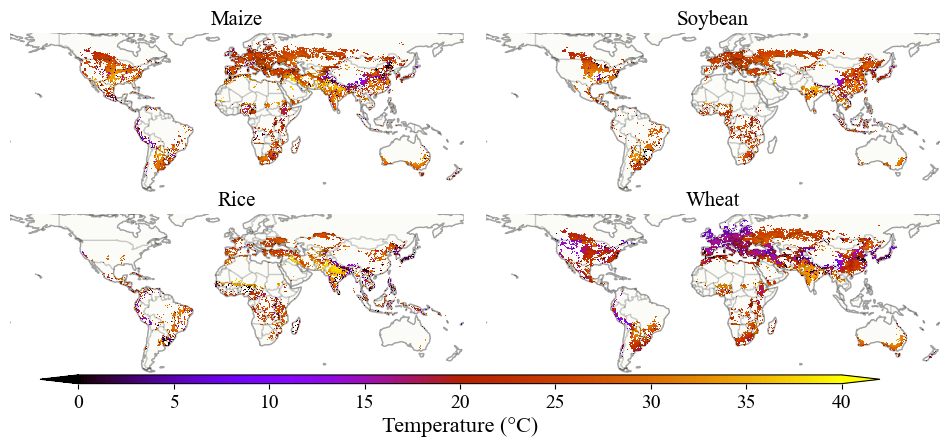

In [70]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
fp2=r'F:\paper3_fig_v2\extreme\threshold\results'
mpl.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure(figsize=(12, 4.35))
gs = GridSpec(2, 2, figure=fig)  # 4行1列布局
crops=['maiz','soyb','rice','whea']
crop_name = ['Maize', 'Soybean', 'Rice', 'Wheat']
var='drought_tas'
data_dict={}
fig.subplots_adjust(hspace=0.005,top=0.94,wspace=0.05)  # 这里的 hspace 控制垂直间距，可以根据需要调整
# 遍历每个作物
for idx, crop in enumerate(crops):
    data_dict[crop]={}
    if crop !='whea':
        frac_irr=xr.open_dataset(join(frac_fp,f'{crop}_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'{crop}_sou_irr.nc'))['__xarray_dataarray_variable__']
        frac_rf=xr.open_dataset(join(frac_fp,f'{crop}_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'{crop}_sou_rf.nc'))['__xarray_dataarray_variable__']
        yield_irr=xr.open_dataset(join(fp2,f'{crop}_nor_irr_threshold_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'{crop}_sou_irr_threshold_climate.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp2,f'{crop}_nor_rf_threshold_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'{crop}_sou_rf_threshold_climate.nc'))[var].fillna(0)
        yield_change=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change=yield_change.where(yield_change>0)
    else:
        frac_irr=xr.open_dataset(join(frac_fp,f'swh_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'swh_sou_irr.nc'))['__xarray_dataarray_variable__']+\
        xr.open_dataset(join(frac_fp,f'wwh_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'wwh_sou_irr.nc'))['__xarray_dataarray_variable__']
        frac_rf=xr.open_dataset(join(frac_fp,f'swh_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'swh_sou_rf.nc'))['__xarray_dataarray_variable__']+\
        xr.open_dataset(join(frac_fp,f'wwh_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'wwh_sou_rf.nc'))['__xarray_dataarray_variable__']
        yield_irr=xr.open_dataset(join(fp2,f'swh_nor_irr_threshold_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'swh_sou_irr_threshold_climate.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp2,f'wwh_nor_irr_threshold_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'wwh_sou_irr_threshold_climate.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp2,f'swh_nor_rf_threshold_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'swh_sou_rf_threshold_climate.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp2,f'wwh_nor_rf_threshold_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'wwh_sou_rf_threshold_climate.nc'))[var].fillna(0)
        yield_change=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change=yield_change.where(yield_change>0)
    data_dict[crop]=yield_change
    # data_dict{crop}
        # 在4行1列的第 idx 个位置创建子图
    ax = fig.add_subplot(gs[idx], projection=ccrs.PlateCarree())
    
    # 设置显示范围为南纬60°到北纬60°
    ax.set_extent([-180, 180, -60, 70], crs=ccrs.PlateCarree())
    
    # 添加地图特征
    ax.add_feature(cfeature.COASTLINE, alpha=0.2)
    ax.add_feature(cfeature.LAND, edgecolor='black', alpha=0.2)
    
    # 绘制数据并设置颜色带
    im = yield_change.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='gnuplot', 
                         vmin=0, vmax=40, add_colorbar=False)
    print(crop,yield_change.mean().values)
    # 移除网格线
    gl = ax.gridlines(draw_labels=False)
    gl.xlines = False
    gl.ylines = False
    ax.set_title(crop_name[idx], fontsize=15)
    # 去除四周边框
    ax.spines['geo'].set_visible(False)
    # ax.text(-0.05, 0.5, crop, transform=ax.transAxes, fontsize=14, 
    #         verticalalignment='center', horizontalalignment='center', rotation=90)
    ax.add_feature(cfeature.BORDERS, edgecolor='black', alpha=0.2)
# 添加一个全局的颜色带
cbar_ax = fig.add_axes([0.15, 0.115, 0.7, 0.02])  # 颜色带的位置: [左, 下, 宽, 高]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', pad=0.03, shrink=1, aspect=50, extend='both')
cbar.set_label('Temperature (°C)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
# 调整子图间距


# 保存图像
plt.savefig(rf'F:\paper3_fig_v2\extreme\threshold\fig\extreme_Temperature.png', dpi=300)
plt.show()

maiz 23.362345603325135
soyb 26.91013218698675
rice 25.887922086156564
whea 21.868235688280308


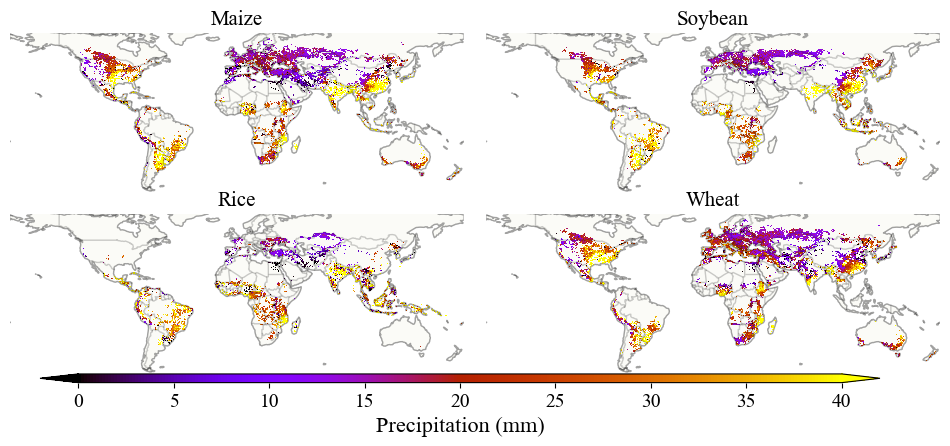

In [84]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
fp2=r'F:\paper3_fig_v2\extreme\threshold\results'
mpl.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure(figsize=(12, 4.35))
gs = GridSpec(2, 2, figure=fig)  # 4行1列布局
crops=['maiz','soyb','rice','whea']
crop_name = ['Maize', 'Soybean', 'Rice', 'Wheat']
var='flood_pr'
data_dict={}
fig.subplots_adjust(hspace=0.005,top=0.94,wspace=0.05)  # 这里的 hspace 控制垂直间距，可以根据需要调整
# 遍历每个作物
for idx, crop in enumerate(crops):
    data_dict[crop]={}
    if crop !='whea':
        frac_irr=xr.open_dataset(join(frac_fp,f'{crop}_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'{crop}_sou_irr.nc'))['__xarray_dataarray_variable__']
        frac_rf=xr.open_dataset(join(frac_fp,f'{crop}_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'{crop}_sou_rf.nc'))['__xarray_dataarray_variable__']
        yield_irr=xr.open_dataset(join(fp2,f'{crop}_nor_irr_threshold_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'{crop}_sou_irr_threshold_climate.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp2,f'{crop}_nor_rf_threshold_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'{crop}_sou_rf_threshold_climate.nc'))[var].fillna(0)
        yield_change=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change=yield_change.where(yield_change>0)
    else:
        frac_irr=xr.open_dataset(join(frac_fp,f'swh_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'swh_sou_irr.nc'))['__xarray_dataarray_variable__']+\
        xr.open_dataset(join(frac_fp,f'wwh_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'wwh_sou_irr.nc'))['__xarray_dataarray_variable__']
        frac_rf=xr.open_dataset(join(frac_fp,f'swh_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'swh_sou_rf.nc'))['__xarray_dataarray_variable__']+\
        xr.open_dataset(join(frac_fp,f'wwh_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'wwh_sou_rf.nc'))['__xarray_dataarray_variable__']
        yield_irr=xr.open_dataset(join(fp2,f'swh_nor_irr_threshold_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'swh_sou_irr_threshold_climate.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp2,f'wwh_nor_irr_threshold_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'wwh_sou_irr_threshold_climate.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp2,f'swh_nor_rf_threshold_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'swh_sou_rf_threshold_climate.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp2,f'wwh_nor_rf_threshold_climate.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'wwh_sou_rf_threshold_climate.nc'))[var].fillna(0)
        yield_change=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change=yield_change.where(yield_change>0)
    data_dict[crop]=yield_change
    # data_dict{crop}
        # 在4行1列的第 idx 个位置创建子图
    ax = fig.add_subplot(gs[idx], projection=ccrs.PlateCarree())
    
    # 设置显示范围为南纬60°到北纬60°
    ax.set_extent([-180, 180, -60, 70], crs=ccrs.PlateCarree())
    
    # 添加地图特征
    ax.add_feature(cfeature.COASTLINE, alpha=0.2)
    ax.add_feature(cfeature.LAND, edgecolor='black', alpha=0.2)
    
    # 绘制数据并设置颜色带
    im = yield_change.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='gnuplot', 
                         vmin=0, vmax=40, add_colorbar=False)
    print(crop,yield_change.mean().values)
    # 移除网格线
    gl = ax.gridlines(draw_labels=False)
    gl.xlines = False
    gl.ylines = False
    ax.set_title(crop_name[idx], fontsize=15)
    # 去除四周边框
    ax.spines['geo'].set_visible(False)
    # ax.text(-0.05, 0.5, crop, transform=ax.transAxes, fontsize=14, 
    #         verticalalignment='center', horizontalalignment='center', rotation=90)
    ax.add_feature(cfeature.BORDERS, edgecolor='black', alpha=0.2)
# 添加一个全局的颜色带
cbar_ax = fig.add_axes([0.15, 0.117, 0.7, 0.02])  # 颜色带的位置: [左, 下, 宽, 高]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', pad=0.03, shrink=1, aspect=50, extend='both')
cbar.set_label('Precipitation (mm)', fontsize=16)
cbar.ax.tick_params(labelsize=14)
# 调整子图间距


# 保存图像
plt.savefig(rf'F:\paper3_fig_v2\extreme\threshold\fig\extreme_Precipitation.png', dpi=300)
plt.show()

maiz 28.657219296968517
soyb 25.12505530334534
rice 23.45372210049228
whea 22.238006265565616


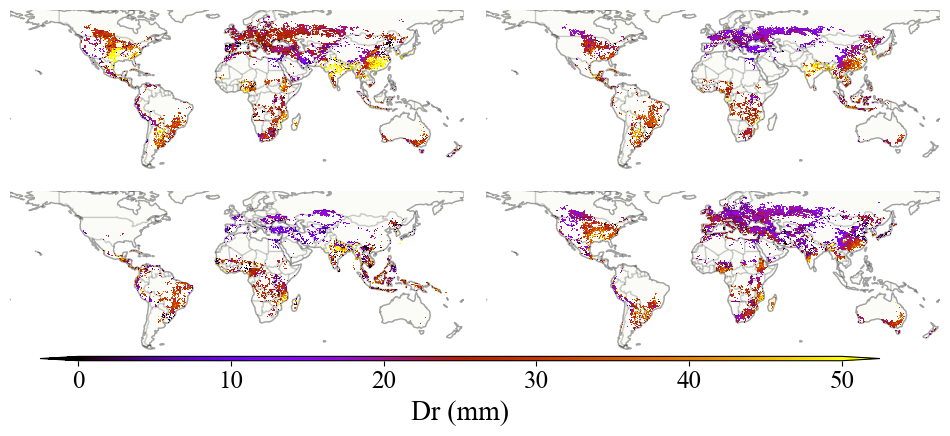

In [80]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
fp2=r'F:\paper3_fig_v2\extreme\threshold\results'
mpl.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure(figsize=(12, 4.35))
gs = GridSpec(2, 2, figure=fig)  # 4行1列布局
crops=['maiz','soyb','rice','whea']
var='flood_mm'
data_dict={}
fp2='F:\\paper3_fig_v2\\extreme\\threshold\\results'
fp1='F:\\paper3_fig_v2\\extreme\\threshold\\results'
# 遍历每个作物
fig.subplots_adjust(hspace=0.005,top=0.94,wspace=0.05)  # 这里的 hspace 控制垂直间距，可以根据需要调整
for idx, crop in enumerate(crops):
    data_dict[crop]={}
    if crop !='whea':
        frac_irr=xr.open_dataset(join(frac_fp,f'{crop}_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'{crop}_sou_irr.nc'))['__xarray_dataarray_variable__']
        frac_rf=xr.open_dataset(join(frac_fp,f'{crop}_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'{crop}_sou_rf.nc'))['__xarray_dataarray_variable__']
        yield_irr=xr.open_dataset(join(fp2,f'{crop}_nor_irr_threshold_mm.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'{crop}_sou_irr_threshold_mm.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp2,f'{crop}_nor_rf_threshold_mm.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'{crop}_sou_rf_threshold_mm.nc'))[var].fillna(0)
        yield_change=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change=yield_change.where(yield_change>0)
    else:
        frac_irr=xr.open_dataset(join(frac_fp,f'swh_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'swh_sou_irr.nc'))['__xarray_dataarray_variable__']+\
        xr.open_dataset(join(frac_fp,f'wwh_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'wwh_sou_irr.nc'))['__xarray_dataarray_variable__']
        frac_rf=xr.open_dataset(join(frac_fp,f'swh_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'swh_sou_rf.nc'))['__xarray_dataarray_variable__']+\
        xr.open_dataset(join(frac_fp,f'wwh_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'wwh_sou_rf.nc'))['__xarray_dataarray_variable__']
        yield_irr=xr.open_dataset(join(fp2,f'swh_nor_irr_threshold_mm.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'swh_sou_irr_threshold_mm.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp2,f'wwh_nor_irr_threshold_mm.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'wwh_sou_irr_threshold_mm.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp2,f'swh_nor_rf_threshold_mm.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'swh_sou_rf_threshold_mm.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp2,f'wwh_nor_rf_threshold_mm.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'wwh_sou_rf_threshold_mm.nc'))[var].fillna(0)
        yield_change=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change=yield_change.where(yield_change>0)
    data_dict[crop]=yield_change
    # data_dict{crop}
        # 在4行1列的第 idx 个位置创建子图
    ax = fig.add_subplot(gs[idx], projection=ccrs.PlateCarree())
    
    # 设置显示范围为南纬60°到北纬60°
    ax.set_extent([-180, 180, -60, 70], crs=ccrs.PlateCarree())
    
    # 添加地图特征
    ax.add_feature(cfeature.COASTLINE, alpha=0.2)
    ax.add_feature(cfeature.LAND, edgecolor='black', alpha=0.2)
    
    # 绘制数据并设置颜色带
    im = yield_change.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='gnuplot', 
                         vmin=0, vmax=50, add_colorbar=False)
    print(crop,yield_change.mean().values)
    # 移除网格线
    gl = ax.gridlines(draw_labels=False)
    gl.xlines = False
    gl.ylines = False

    # 去除四周边框
    ax.spines['geo'].set_visible(False)
    # ax.text(-0.05, 0.5, crop, transform=ax.transAxes, fontsize=14, 
    #         verticalalignment='center', horizontalalignment='center', rotation=90)
    ax.add_feature(cfeature.BORDERS, edgecolor='black', alpha=0.2)
# 添加一个全局的颜色带
cbar_ax = fig.add_axes([0.15, 0.115, 0.7, 0.01])  # 颜色带的位置: [左, 下, 宽, 高]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', pad=0.03, shrink=1, aspect=50, extend='both')
cbar.set_label('Dr (mm)', fontsize=20)
cbar.ax.tick_params(labelsize=18)
# 调整子图间距
# fig.subplots_adjust(hspace=0.05)  # 这里的 hspace 控制垂直间距，可以根据需要调整

# 保存图像
plt.savefig(rf'F:\paper3_fig_v2\extreme\threshold\fig\dr_extreme_Precipitation.png', dpi=300)
plt.show()

In [83]:
yield_change.min()

<xarray.DataArray ()> Size: 8B
array(0.)

maiz 1.652513723534473
soyb 2.7255437740655966
rice 2.2586582949404588
whea 2.0120477543613737


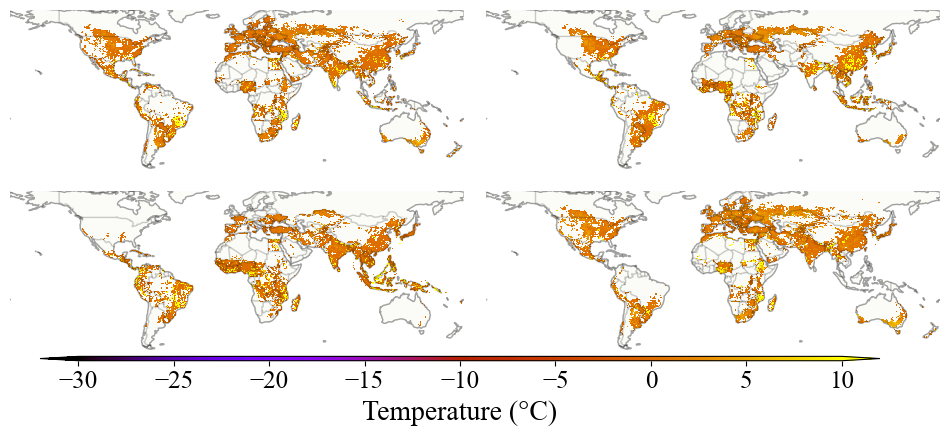

In [81]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
fp2=r'F:\paper3_fig_v2\extreme\threshold\results'
mpl.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure(figsize=(12, 4.35))
gs = GridSpec(2, 2, figure=fig)  # 4行1列布局
crops=['maiz','soyb','rice','whea']
var='drought_mm'
data_dict={}
fp2='F:\\paper3_fig_v2\\extreme\\threshold\\results'
fp1='F:\\paper3_fig_v2\\extreme\\threshold\\results'
# 遍历每个作物
fig.subplots_adjust(hspace=0.005,top=0.94,wspace=0.05)  # 这里的 hspace 控制垂直间距，可以根据需要调整
for idx, crop in enumerate(crops):
    data_dict[crop]={}
    if crop !='whea':
        frac_irr=xr.open_dataset(join(frac_fp,f'{crop}_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'{crop}_sou_irr.nc'))['__xarray_dataarray_variable__']
        frac_rf=xr.open_dataset(join(frac_fp,f'{crop}_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'{crop}_sou_rf.nc'))['__xarray_dataarray_variable__']
        yield_irr=xr.open_dataset(join(fp2,f'{crop}_nor_irr_threshold_mm.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'{crop}_sou_irr_threshold_mm.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp2,f'{crop}_nor_rf_threshold_mm.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'{crop}_sou_rf_threshold_mm.nc'))[var].fillna(0)
        yield_change=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change=yield_change.where((frac_rf+frac_irr)>0)
    else:
        frac_irr=xr.open_dataset(join(frac_fp,f'swh_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'swh_sou_irr.nc'))['__xarray_dataarray_variable__']+\
        xr.open_dataset(join(frac_fp,f'wwh_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'wwh_sou_irr.nc'))['__xarray_dataarray_variable__']
        frac_rf=xr.open_dataset(join(frac_fp,f'swh_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'swh_sou_rf.nc'))['__xarray_dataarray_variable__']+\
        xr.open_dataset(join(frac_fp,f'wwh_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'wwh_sou_rf.nc'))['__xarray_dataarray_variable__']
        yield_irr=xr.open_dataset(join(fp2,f'swh_nor_irr_threshold_mm.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'swh_sou_irr_threshold_mm.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp2,f'wwh_nor_irr_threshold_mm.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'wwh_sou_irr_threshold_mm.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp2,f'swh_nor_rf_threshold_mm.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'swh_sou_rf_threshold_mm.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp2,f'wwh_nor_rf_threshold_mm.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'wwh_sou_rf_threshold_mm.nc'))[var].fillna(0)
        yield_change=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change=yield_change.where((frac_rf+frac_irr)>0)
    data_dict[crop]=yield_change
    # data_dict{crop}
        # 在4行1列的第 idx 个位置创建子图
    ax = fig.add_subplot(gs[idx], projection=ccrs.PlateCarree())
    
    # 设置显示范围为南纬60°到北纬60°
    ax.set_extent([-180, 180, -60, 70], crs=ccrs.PlateCarree())
    
    # 添加地图特征
    ax.add_feature(cfeature.COASTLINE, alpha=0.2)
    ax.add_feature(cfeature.LAND, edgecolor='black', alpha=0.2)
    
    # 绘制数据并设置颜色带
    im = yield_change.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='gnuplot', 
                         vmin=-30, vmax=10, add_colorbar=False)
    print(crop,yield_change.mean().values)
    # 移除网格线
    gl = ax.gridlines(draw_labels=False)
    gl.xlines = False
    gl.ylines = False

    # 去除四周边框
    ax.spines['geo'].set_visible(False)
    # ax.text(-0.05, 0.5, crop, transform=ax.transAxes, fontsize=14, 
    #         verticalalignment='center', horizontalalignment='center', rotation=90)
    ax.add_feature(cfeature.BORDERS, edgecolor='black', alpha=0.2)
# 添加一个全局的颜色带
cbar_ax = fig.add_axes([0.15, 0.115, 0.7, 0.01])  # 颜色带的位置: [左, 下, 宽, 高]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', pad=0.03, shrink=1, aspect=50, extend='both')
cbar.set_label('Temperature (°C)', fontsize=20)
cbar.ax.tick_params(labelsize=18)
# 调整子图间距
# fig.subplots_adjust(hspace=0.05)  # 这里的 hspace 控制垂直间距，可以根据需要调整

# 保存图像
plt.savefig(rf'F:\paper3_fig_v2\extreme\threshold\fig\dr_extreme_Temperature.png', dpi=300)
plt.show()

### frequency

maiz 128.97358579930395
soyb 61.40066111210439
rice 87.44288767789777
whea 70.76124962656402


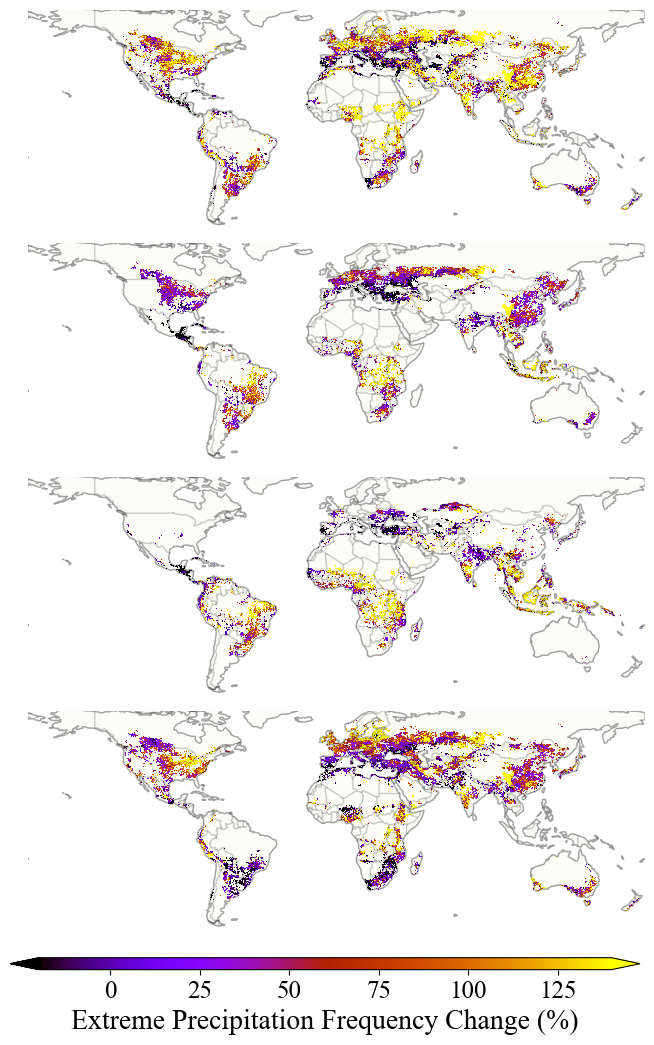

In [33]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure(figsize=(9, 12))
gs = GridSpec(4, 1, figure=fig)  # 4行1列布局
crops=['maiz','soyb','rice','whea']
var='count_flood'
data_dict={}
fp2='F:\\paper3_fig_v2\\extreme\\threshold\\results'
fp1='F:\\paper3_fig_v2\\extreme\\threshold\\ssp585'
# 遍历每个作物
for idx, crop in enumerate(crops):
    data_dict[crop]={}
    if crop !='whea':
        frac_irr=xr.open_dataset(join(frac_fp,f'{crop}_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'{crop}_sou_irr.nc'))['__xarray_dataarray_variable__']
        frac_rf=xr.open_dataset(join(frac_fp,f'{crop}_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'{crop}_sou_rf.nc'))['__xarray_dataarray_variable__']
        yield_irr=xr.open_dataset(join(fp2,f'{crop}_nor_irr_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'{crop}_sou_irr_threshold_climate_frequency.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp2,f'{crop}_nor_rf_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'{crop}_sou_rf_threshold_climate_frequency.nc'))[var].fillna(0)
        yield_change2=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change2=yield_change2.where((frac_rf+frac_irr)>0)

        yield_irr=xr.open_dataset(join(fp1,f'{crop}_nor_irr_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp1,f'{crop}_sou_irr_threshold_climate_frequency.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp1,f'{crop}_nor_rf_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp1,f'{crop}_sou_rf_threshold_climate_frequency.nc'))[var].fillna(0)
        yield_change1=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change1=yield_change1.where((frac_rf+frac_irr)>0)
    else:
        frac_irr=xr.open_dataset(join(frac_fp,f'swh_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'swh_sou_irr.nc'))['__xarray_dataarray_variable__']+\
        xr.open_dataset(join(frac_fp,f'wwh_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'wwh_sou_irr.nc'))['__xarray_dataarray_variable__']
        frac_rf=xr.open_dataset(join(frac_fp,f'swh_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'swh_sou_rf.nc'))['__xarray_dataarray_variable__']+\
        xr.open_dataset(join(frac_fp,f'wwh_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'wwh_sou_rf.nc'))['__xarray_dataarray_variable__']
        
        yield_irr=xr.open_dataset(join(fp2,f'swh_nor_irr_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'swh_sou_irr_threshold_climate_frequency.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp2,f'wwh_nor_irr_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'wwh_sou_irr_threshold_climate_frequency.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp2,f'swh_nor_rf_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'swh_sou_rf_threshold_climate_frequency.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp2,f'wwh_nor_rf_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'wwh_sou_rf_threshold_climate_frequency.nc'))[var].fillna(0)
        yield_change2=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change2=yield_change2.where((frac_rf+frac_irr)>0)

        yield_irr=xr.open_dataset(join(fp1,f'swh_nor_irr_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp1,f'swh_sou_irr_threshold_climate_frequency.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp1,f'wwh_nor_irr_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp1,f'wwh_sou_irr_threshold_climate_frequency.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp1,f'swh_nor_rf_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp1,f'swh_sou_rf_threshold_climate_frequency.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp1,f'wwh_nor_rf_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp1,f'wwh_sou_rf_threshold_climate_frequency.nc'))[var].fillna(0)
        yield_change1=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change1=yield_change1.where((frac_rf+frac_irr)>0)
    # yield_change=(yield_change1-yield_change2)/yield_change2*100
    yield_change=(yield_change1/31-yield_change2/40)/(yield_change2/40)*100
    data_dict[crop]=yield_change.where((yield_change2)!=0)
    # data_dict{crop}
        # 在4行1列的第 idx 个位置创建子图
    ax = fig.add_subplot(gs[idx], projection=ccrs.PlateCarree())
    
    # 设置显示范围为南纬60°到北纬60°
    ax.set_extent([-180, 180, -60, 70], crs=ccrs.PlateCarree())
    
    # 添加地图特征
    ax.add_feature(cfeature.COASTLINE, alpha=0.2)
    ax.add_feature(cfeature.LAND, edgecolor='black', alpha=0.2)
    
    # 绘制数据并设置颜色带
    im = data_dict[crop].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='gnuplot', 
                         vmin=-20, vmax=140, add_colorbar=False)
    print(crop,data_dict[crop].mean().values)
    # 移除网格线
    gl = ax.gridlines(draw_labels=False)
    gl.xlines = False
    gl.ylines = False

    # 去除四周边框
    ax.spines['geo'].set_visible(False)
    # ax.text(-0.05, 0.5, crop, transform=ax.transAxes, fontsize=14, 
    #         verticalalignment='center', horizontalalignment='center', rotation=90)
    ax.add_feature(cfeature.BORDERS, edgecolor='black', alpha=0.2)
# 添加一个全局的颜色带
cbar_ax = fig.add_axes([0.15, 0.08, 0.7, 0.01])  # 颜色带的位置: [左, 下, 宽, 高]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', pad=0.03, shrink=1, aspect=50, extend='both')
cbar.set_label('Extreme Precipitation Frequency Change (%)', fontsize=20)
cbar.ax.tick_params(labelsize=18)
# 调整子图间距
fig.subplots_adjust(hspace=0.05)  # 这里的 hspace 控制垂直间距，可以根据需要调整

# 保存图像
plt.savefig(rf'F:\paper3_fig_v2\extreme\threshold\fig\Extreme Precipitation Frequency Change.png', dpi=300)
plt.show()

maiz 4.121145092456579
soyb 6.295297446255007
rice 7.2788268505550136
whea 2.54422554759228


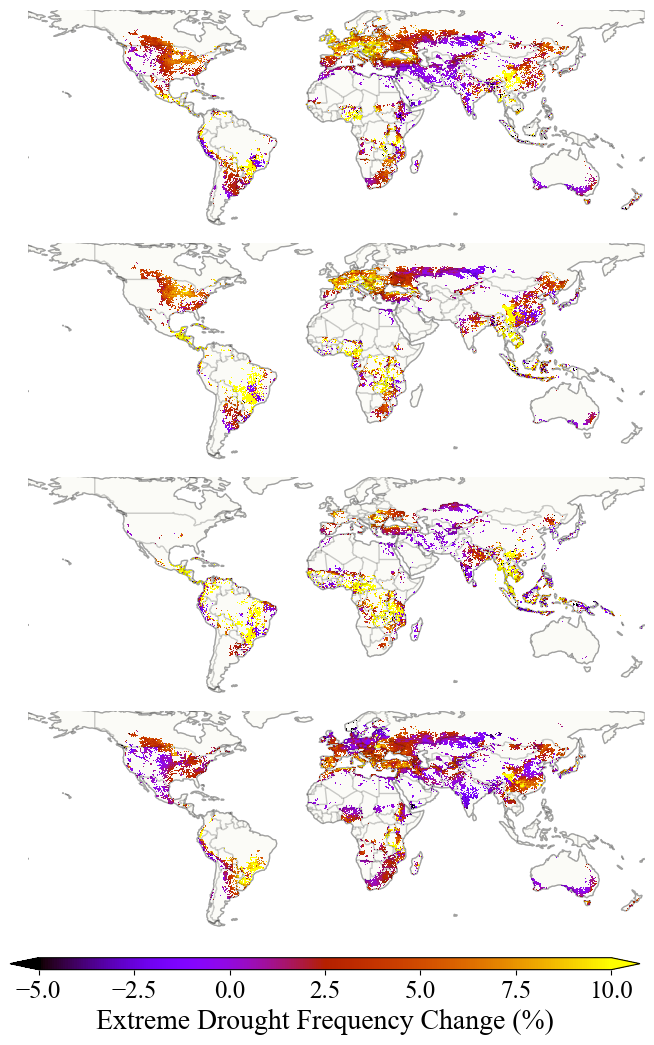

In [34]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure(figsize=(9, 12))
gs = GridSpec(4, 1, figure=fig)  # 4行1列布局
crops=['maiz','soyb','rice','whea']
var='count_drought'
data_dict={}
fp2='F:\\paper3_fig_v2\\extreme\\threshold\\results'
fp1='F:\\paper3_fig_v2\\extreme\\threshold\\ssp585'
# 遍历每个作物
for idx, crop in enumerate(crops):
    data_dict[crop]={}
    if crop !='whea':
        frac_irr=xr.open_dataset(join(frac_fp,f'{crop}_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'{crop}_sou_irr.nc'))['__xarray_dataarray_variable__']
        frac_rf=xr.open_dataset(join(frac_fp,f'{crop}_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'{crop}_sou_rf.nc'))['__xarray_dataarray_variable__']
        yield_irr=xr.open_dataset(join(fp2,f'{crop}_nor_irr_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'{crop}_sou_irr_threshold_climate_frequency.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp2,f'{crop}_nor_rf_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'{crop}_sou_rf_threshold_climate_frequency.nc'))[var].fillna(0)
        yield_change2=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change2=yield_change2.where((frac_rf+frac_irr)>0)

        yield_irr=xr.open_dataset(join(fp1,f'{crop}_nor_irr_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp1,f'{crop}_sou_irr_threshold_climate_frequency.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp1,f'{crop}_nor_rf_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp1,f'{crop}_sou_rf_threshold_climate_frequency.nc'))[var].fillna(0)
        yield_change1=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change1=yield_change1.where((frac_rf+frac_irr)>0)
    else:
        frac_irr=xr.open_dataset(join(frac_fp,f'swh_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'swh_sou_irr.nc'))['__xarray_dataarray_variable__']+\
        xr.open_dataset(join(frac_fp,f'wwh_nor_irr.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'wwh_sou_irr.nc'))['__xarray_dataarray_variable__']
        frac_rf=xr.open_dataset(join(frac_fp,f'swh_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'swh_sou_rf.nc'))['__xarray_dataarray_variable__']+\
        xr.open_dataset(join(frac_fp,f'wwh_nor_rf.nc'))['__xarray_dataarray_variable__'] +xr.open_dataset(join(frac_fp,f'wwh_sou_rf.nc'))['__xarray_dataarray_variable__']
        
        yield_irr=xr.open_dataset(join(fp2,f'swh_nor_irr_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'swh_sou_irr_threshold_climate_frequency.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp2,f'wwh_nor_irr_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'wwh_sou_irr_threshold_climate_frequency.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp2,f'swh_nor_rf_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'swh_sou_rf_threshold_climate_frequency.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp2,f'wwh_nor_rf_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp2,f'wwh_sou_rf_threshold_climate_frequency.nc'))[var].fillna(0)
        yield_change2=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change2=yield_change2.where((frac_rf+frac_irr)>0)

        yield_irr=xr.open_dataset(join(fp1,f'swh_nor_irr_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp1,f'swh_sou_irr_threshold_climate_frequency.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp1,f'wwh_nor_irr_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp1,f'wwh_sou_irr_threshold_climate_frequency.nc'))[var].fillna(0)
        yield_rf=xr.open_dataset(join(fp1,f'swh_nor_rf_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp1,f'swh_sou_rf_threshold_climate_frequency.nc'))[var].fillna(0)+\
        xr.open_dataset(join(fp1,f'wwh_nor_rf_threshold_climate_frequency.nc'))[var].fillna(0) + xr.open_dataset(join(fp1,f'wwh_sou_rf_threshold_climate_frequency.nc'))[var].fillna(0)
        yield_change1=((yield_rf*frac_rf/(frac_rf+frac_irr)).fillna(0)+(yield_irr*frac_irr/(frac_rf+frac_irr)).fillna(0))
        yield_change1=yield_change1.where((frac_rf+frac_irr)>0)
    yield_change=(yield_change1/31-yield_change2/40)/(yield_change2/40)*100
    # yield_change=(yield_change1-yield_change2)/yield_change2*100
    data_dict[crop]=yield_change.where((yield_change2)!=0)
    # data_dict{crop}
        # 在4行1列的第 idx 个位置创建子图
    ax = fig.add_subplot(gs[idx], projection=ccrs.PlateCarree())
    
    # 设置显示范围为南纬60°到北纬60°
    ax.set_extent([-180, 180, -60, 70], crs=ccrs.PlateCarree())
    
    # 添加地图特征
    ax.add_feature(cfeature.COASTLINE, alpha=0.2)
    ax.add_feature(cfeature.LAND, edgecolor='black', alpha=0.2)
    
    # 绘制数据并设置颜色带
    im = data_dict[crop].plot(ax=ax, transform=ccrs.PlateCarree(), cmap='gnuplot', 
                         vmin=-5, vmax=10, add_colorbar=False)
    print(crop,data_dict[crop].mean().values)
    # 移除网格线
    gl = ax.gridlines(draw_labels=False)
    gl.xlines = False
    gl.ylines = False

    # 去除四周边框
    ax.spines['geo'].set_visible(False)
    # ax.text(-0.05, 0.5, crop, transform=ax.transAxes, fontsize=14, 
    #         verticalalignment='center', horizontalalignment='center', rotation=90)
    ax.add_feature(cfeature.BORDERS, edgecolor='black', alpha=0.2)
# 添加一个全局的颜色带
cbar_ax = fig.add_axes([0.15, 0.08, 0.7, 0.01])  # 颜色带的位置: [左, 下, 宽, 高]
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', pad=0.03, shrink=1, aspect=50, extend='both')
cbar.set_label('Extreme Drought Frequency Change (%)', fontsize=20)
cbar.ax.tick_params(labelsize=18)
# 调整子图间距
fig.subplots_adjust(hspace=0.05)  # 这里的 hspace 控制垂直间距，可以根据需要调整

# 保存图像
plt.savefig(rf'F:\paper3_fig_v2\extreme\threshold\fig\Extreme Drought Frequency Change.png', dpi=300)
plt.show()